Random starting weights: 
[[4.17022005e-01]
 [7.20324493e-01]
 [1.14374817e-04]]
New synaptic weights after training: 
[[0.63474177]
 [0.96525923]
 [0.10897426]]
[76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]
[75.8700737246755, 78.29826920815644, 75.98084532544415, 77.15270384080365, 77.71981190886407, 77.30481599656758, 78.82403672122157, 81.69352126500573, 79.85692965482053, 81.63723679323572, 83.34800939566372, 82.23063800930285, 83.99589774072948, 83.28037569266172, 84.21934177525196, 86.28882581820645, 85.65408404714404, 84.54985923478654, 85.81934277691133, 89.99965141781554, 88.09542610462834, 88.52356859092819, 89.5715089315157, 91.26913495994035, 89.84753926205163, 93.86258917318855, 91.47573424470289, 91.0907296561697, 91.97151043400473, 92.63624352883042, 94.44284381525233, 95.9752111139097, 95.47943492460786, 95.29733144508064, 96.67758658797409,

Text(0.5,0,'Blood Pressure')

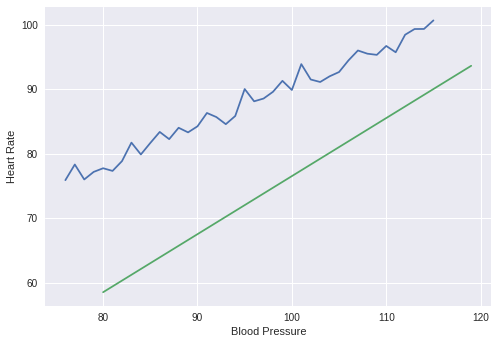

In [12]:

!pip install --upgrade -q gspread
!pip install gspread-dataframe

import numpy as np
import pandas as pd
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
import statistics
import matplotlib.pyplot as plt

from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

def makeSample():
  return [np.random.normal(110,7,None),np.random.normal(15,0.5,None),np.random.normal(98.3,0.2,None)]


def makeNewSample():
  return [np.random.normal(110,7,None),np.random.normal(15,0.5,None),np.random.normal(98,0.2,None)]


import tensorflow as tf

holder = []


for u in range(0,1214):
  holder.append([8,9,4])
  
for q in range(0,1213):
  holder[q] = makeSample()

#print(holder)

gaw = np.random.normal(85,8,1214)

for r in range(0,1214) :
  gaw[r] = gaw[r] - gaw[r]%0.1
  
#print(gaw)

v = gaw

v[1213] = 10

np.random.seed(1)
x = np.array(holder)
y = np.array([v]).T

print("Random starting weights: ")
synaptic_weights = np.random.random((3,1))
print(synaptic_weights)

for iteration in range(1000):
    z = np.dot(x, synaptic_weights)
    sigmoid = 1/(1+np.exp(-z))
    error = (y - sigmoid)
    sigmoidDerivative = sigmoid * (1 - sigmoid)
    synaptic_weights += np.dot(x.T, error*sigmoidDerivative)

print("New synaptic weights after training: ")
print(synaptic_weights)

i = 0

x_val = []
y_val = []

while i < 40:
  testData = []

  for r in range(0,40):
    x = np.random.normal(80+i,7,None) #HR
    z = np.random.normal(98,.3, None) #Body Temp
    y= np.random.normal(15,1, None)  # Resp R
    testData.append([x - x%1,y- y%1, z - z%1])

  resultData = []

  for er in range(0,24):
    newZ = np.dot(np.array(testData[er]), synaptic_weights)
    activationOutput = 1/(1+np.exp(-newZ))
    resultData.append(newZ[0])
  
  #print(statistics.mean(resultData))
  #print(statistics.median(resultData))
  
  i = i+1
  x_val.append(75+i)
  y_val.append(statistics.median(resultData))
  
  
  
print(x_val)
print(y_val)

x = range(80,120)
y = []

for r in x:
  y.append((r-15)*0.9)

plt.plot(x_val, y_val,x,y)
plt.ylabel('Heart Rate')
plt.xlabel('Blood Pressure')


